In [8]:
from config import API_KEY
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [9]:
# Data Collection
from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

In [4]:
# change time period to business days
# df.index = pd.to_datetime(df.index).to_period('B')

df.index


c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


PeriodIndex(['2004-02-25', '2004-02-26', '2004-02-27', '2004-03-01',
             '2004-03-02', '2004-03-03', '2004-03-04', '2004-03-05',
             '2004-03-08', '2004-03-09',
             ...
             '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
             '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
             '2024-02-16', '2024-02-20'],
            dtype='period[B]', name='date', length=5031)

In [6]:
# get index range
# idx = pd.period_range(min(df.index), max(df.index))
# idx

PeriodIndex(['2004-02-25', '2004-02-26', '2004-02-27', '2004-02-28',
             '2004-02-29', '2004-03-01', '2004-03-02', '2004-03-03',
             '2004-03-04', '2004-03-05',
             ...
             '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14',
             '2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
             '2024-02-19', '2024-02-20'],
            dtype='period[D]', length=7301)

In [ ]:
# the days that data was not available - market was closed
# df.index.symmetric_difference(idx)

In [10]:
import numpy as np
# reindex and fill null values with nan
# df = df.reindex(idx,fill_value=np.nan)
# df.head()

<AxesSubplot: xlabel='date'>

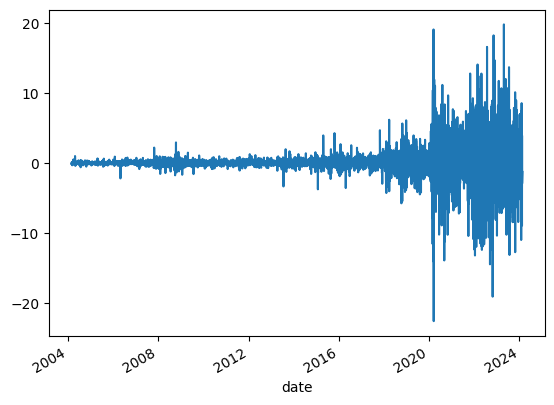

In [11]:
diffs = df.diff()

# this de-trends your data
diffs.adjClose.plot()

In [12]:

diffs

data = diffs.loc[:,'adjClose':].dropna
data

# np.float128(data)
# data.adjClose.astype('float64')

<bound method DataFrame.dropna of                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                   
2004-02-25 00:00:00+00:00       NaN        NaN        NaN        NaN   
2004-02-26 00:00:00+00:00 -0.125110  -0.212687  -0.125110  -0.162643   
2004-02-27 00:00:00+00:00  0.018767  -0.018767  -0.037533  -0.093833   
2004-03-01 00:00:00+00:00  0.106344   0.062555   0.093833   0.106344   
2004-03-02 00:00:00+00:00 -0.193921  -0.018767  -0.093833  -0.012511   
...                             ...        ...        ...        ...   
2024-02-13 00:00:00+00:00 -8.923656 -10.649495 -11.339232 -15.586453   
2024-02-14 00:00:00+00:00  3.912833   0.518691   1.917477   3.870311   
2024-02-15 00:00:00+00:00 -2.930000  -0.710000  -0.280000   0.070000   
2024-02-16 00:00:00+00:00 -2.500000  -0.840000  -0.850000  -0.180000   
2024-02-20 00:00:00+00:00 -1.270000  -3.800000  -5.430000  -4.720000   

                            a

In [ ]:
# forward fill so that days where the market was closed will have the stock price for the previous day
df = df.fillna(method='ffill')
df.head()

In [ ]:
df.plot()
plt.show()

In [ ]:
df.drop(['volume','close','high','low','open','adjVolume','divCash'],axis=1,inplace=True)
df = df[['adjClose']]
df.head()


In [ ]:
df = df.dropna()
df

In [ ]:
# Split Train Test into 80/20 ratio

pos=int(round(len(df)*(0.8)))
train=df[:pos]
test=df[pos:]
train.shape, test.shape

In [ ]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

ts = np.arange(10)
splitter=SlidingWindowSplitter

In [ ]:
# from pycaret.regression import *
# features = lag_features
# close_s = setup(data=train, test_data=test, target='adjClose', fold_strategy='timeseries', feature_selection=lag_features, data_split_shuffle=False, fold_shuffle=False, session_id=123)


In [ ]:
from pycaret.time_series import *
setup(data=train, target='adjClose',fh = 7, fold = 3,seasonal_period=90, session_id = 123)

In [ ]:
close_best = compare_models(sort = 'R2')

In [ ]:
prediction = predict_model(close_best, fh = 90)
prediction.head(60)
